# Wine Quality
   
### Feature And Model Selection Project

In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression

### Download Data:

In [2]:
# download the data from URL
wine_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter = ";")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

In [5]:
# export the data
wine_data.to_csv("../data/winequality.csv")

### Data Wrangling and EDA:

In [6]:
# check whether any column contains missing values
wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
# select all independent variables
wine_data.iloc[:, 0:11]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


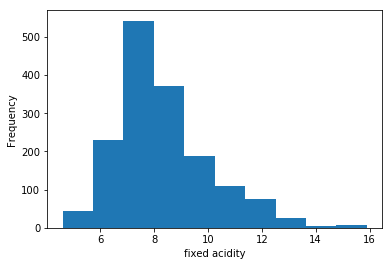

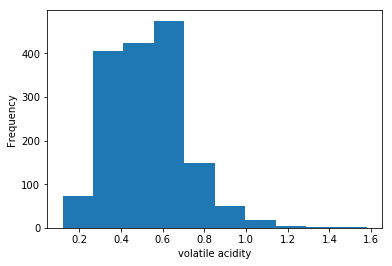

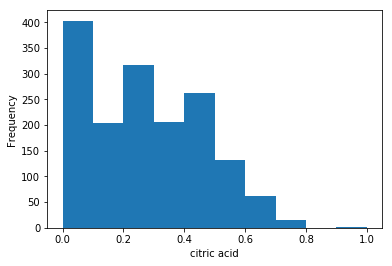

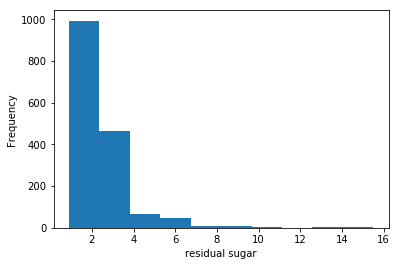

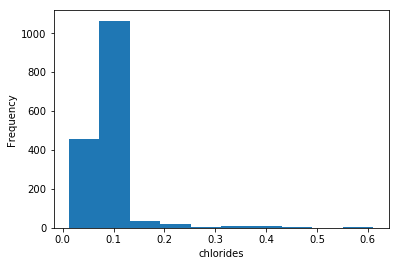

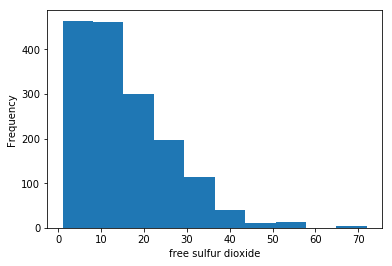

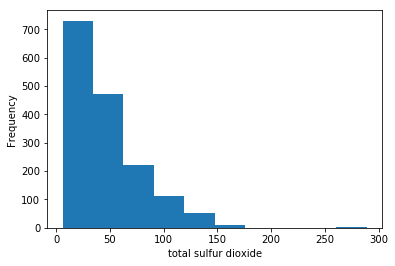

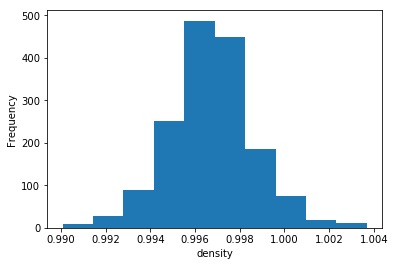

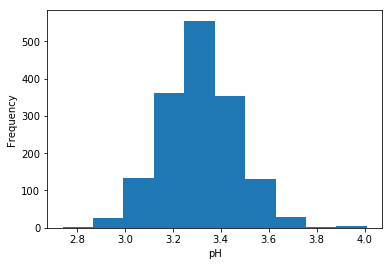

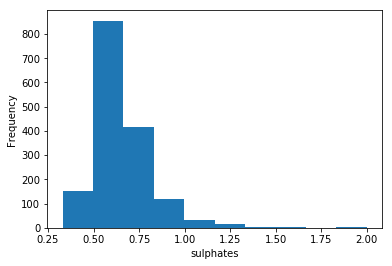

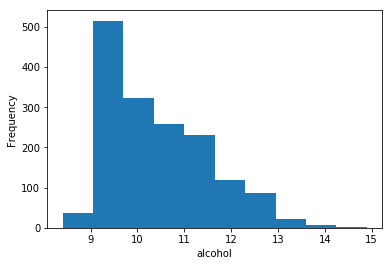

In [8]:
# check the distribution of each feature
colnames = wine_data.iloc[:, 0:11].columns

for name in colnames:
    plt.hist(wine_data[name])
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
# split the data into training set and validation set
Xtrain, Xtest, ytrain, ytest = train_test_split(wine_data.iloc[:, 0:11], wine_data.quality, test_size = 0.30)

In [10]:
Xtrain.shape

(1119, 11)

In [11]:
Xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
596,12.4,0.40,0.51,2.0,0.059,6.0,24.0,0.9994,3.04,0.60,9.3
177,7.5,0.52,0.42,2.3,0.087,8.0,38.0,0.9972,3.58,0.61,10.5
404,7.7,0.69,0.05,2.7,0.075,15.0,27.0,0.9974,3.26,0.61,9.1
616,9.6,0.60,0.50,2.3,0.079,28.0,71.0,0.9997,3.50,0.57,9.7
716,8.0,0.43,0.36,2.3,0.075,10.0,48.0,0.9976,3.34,0.46,9.4


In [12]:
ytrain.head()

655    5
631    5
970    6
225    6
162    6
Name: quality, dtype: int64

In [13]:
ytest.shape

(480,)

### Feature And Model Selection:

In [31]:
# fit a SVC model and conduct the cross validate 
parameters = {"C": [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              "gamma": [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}

svc = SVC(kernel = "rbf") 
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(Xtrain, ytrain)

print("Best parameters: ", clf.best_params_)
print("Cross validation score: ", clf.best_score_)

Best parameters:  {'C': 10000.0, 'gamma': 0.0001}
Cross validation score:  0.581769436997


In [72]:
# calculate test error using best parameters
svc = SVC(kernel = "rbf", C = 10000, gamma = 0.0001) 
svc.fit(Xtrain, ytrain)

print("Test error: ", 1 - svc.score(Xtest, ytest))

Test error:  0.420833333333


In [62]:
# fit a random forest model and conduct the cross validate 
parameters = {"n_estimators": np.arange(1, 20, 1)}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv = 5)
clf.fit(Xtrain, ytrain)

print("Best parameters: ", clf.best_params_)
print("Cross validation score: ", clf.best_score_)

Best parameters:  {'n_estimators': 18}
Cross validation score:  0.651474530831


In [73]:
# calculate training and test errors using best parameters
rf = RandomForestClassifier(n_estimators = 18)
rf.fit(Xtrain, ytrain)

print("Test error: ", 1 - rf.score(Xtest, ytest))

Test error:  0.3375


In [74]:
# fit a decision tree model and conduct the cross validate 
parameters = {"max_depth": np.arange(1, 20, 1)}

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, cv = 5)
clf.fit(Xtrain, ytrain)

print("Best parameters: ", clf.best_params_)
print("Cross validation score: ", clf.best_score_)

Best parameters:  {'max_depth': 10}
Cross validation score:  0.586237712243


In [76]:
# calculate training and test errors using best parameters
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(Xtrain, ytrain)

print("Test error: ", 1 - tree.score(Xtest, ytest))

Test error:  0.439583333333


In [64]:
# use RFECV to find the best selection of features with random forest classifier 
estimator = RandomForestClassifier(n_estimators = 18)
selector = RFECV(estimator, step = 1, cv = 5)
selector = selector.fit(Xtrain, ytrain)

In [65]:
# show score of each feature
scores = pd.Series(selector.grid_scores_, index = Xtrain.columns)
scores

fixed acidity           0.465845
volatile acidity        0.539889
citric acid             0.612971
residual sugar          0.623801
chlorides               0.618504
free sulfur dioxide     0.632860
total sulfur dioxide    0.635567
density                 0.630981
pH                      0.641850
sulphates               0.647959
alcohol                 0.639927
dtype: float64

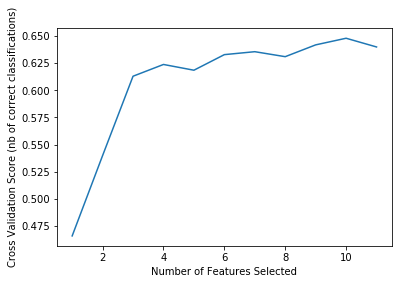

In [66]:
# plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross Validation Score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [67]:
# find the subset of best features
best_features = Xtrain.columns[selector.support_]
features_table = pd.DataFrame(best_features)
features_table.columns = ["Best Features"]
features_table

,Best Features
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,total sulfur dioxide
6,density
7,pH
8,sulphates
9,alcohol


In [80]:
# fit the model again with best features 
Xtrain_best = Xtrain[best_features]
Xtest_best = Xtest[best_features]

best_fit = RandomForestClassifier(n_estimators = 18)
best_fit.fit(Xtrain_best, ytrain)

print("Test error: ", 1 - best_fit.score(Xtest_best, ytest))

Test error:  0.316666666667
